In [79]:
import pandas as pd
from rdkit import Chem
import re
from matplotlib import pyplot as plt

In [8]:
def atom_count(smi):
    atoms = [a for a in Chem.MolFromSmiles(smi).GetAtoms()]
    
    return len(atoms)

def remove_charges_func(reactant):
    # Regular expression to match charges (+, -, and numerical charges like +2, -3, etc.)
    charge_pattern = re.compile(r'(\d+)?[\+\-]')
    # Remove charges from the reactant string
    cleaned_reactant = re.sub(charge_pattern, '', reactant)
    # print(reactant, cleaned_reactant)
    return cleaned_reactant

def reconstruct_mol_from_atoms_and_bonds_only(old_mol, return_smi=False):
    if type(old_mol)==str: old_mol = Chem.MolFromSmiles(old_mol)
    if old_mol is np.nan: return None
    #print(f'old_mol: {old_mol}')
    
    # create atoms based on labels only
    atoms = [a.GetSymbol() for a in old_mol.GetAtoms()]
    bonds = [(b.GetBeginAtom().GetIdx(),b.GetEndAtom().GetIdx(),b.GetBondType()) for b in old_mol.GetBonds()]
    new_mol = Chem.RWMol()
    for a in atoms: new_mol.AddAtom(Chem.Atom(a))
    for beg_atom_idx, end_atom_idx, bond_type in bonds: new_mol.AddBond(beg_atom_idx, end_atom_idx, bond_type)
    
    if return_smi: return Chem.MolToSmiles(new_mol)
    
    return new_mol

In [56]:
common_samples_from_rb_path = '/Users/laabidn1/MolecularTransformer/data/rb_vs_7ck620/samples_from_rb_in_common.csv'
common_samples_from_7ck620_path = '/Users/laabidn1/MolecularTransformer/data/rb_vs_7ck620/samples_from_7ck620_in_common.csv'
samples_from_7ck620_path = '/Users/laabidn1/MolecularTransformer/data/rb_vs_7ck620/samples_from_7ck620.csv'

In [105]:
samples_from_rb_in_common = pd.read_csv(common_samples_from_rb_path, index_col=0, delimiter=',')
samples_from_7ck620_in_common = pd.read_csv(common_samples_from_7ck620_path, index_col=0, delimiter=',')
samples_from_7ck620 = pd.read_csv(samples_from_7ck620_path)

In [61]:
samples_from_7ck620 = samples_from_7ck620.dropna(axis=0)
samples_from_7ck620_in_common = samples_from_7ck620_in_common.dropna(axis=0)
samples_from_7ck620['product'].nunique()


4945

In [ ]:
# reconstruct prediction in 7ck620
samples_from_7ck620_in_common['pred'] = samples_from_7ck620_in_common['pred'].apply(lambda x: reconstruct_mol_from_atoms_and_bonds_only(x,return_smi=True))

In [65]:
samples_from_7ck620_in_common['pred'].str.contains('@').sum()

0

In [ ]:
# reconstruct prediction in 7ck620
samples_from_7ck620_in_common['true'] = samples_from_7ck620_in_common['true'].apply(lambda x: reconstruct_mol_from_atoms_and_bonds_only(x,return_smi=True))

In [ ]:
# reconstruct prediction in 7ck620
samples_from_7ck620_in_common['pred_product'] = samples_from_7ck620_in_common['pred_product'].apply(lambda x: reconstruct_mol_from_atoms_and_bonds_only(x,return_smi=True))

In [68]:
samples_from_7ck620_in_common.to_csv('/Users/laabidn1/MolecularTransformer/data/rb_vs_7ck620/samples_from_7ck620_in_common_all_from_atoms.csv')

In [74]:
nb_unique_predictions_per_product = samples_from_7ck620_in_common.groupby('product').agg({'pred':'size'})['pred'].unique()

In [121]:
grouped_7ck620 = samples_from_7ck620_in_common.groupby('product').agg({'pred':'nunique'})['pred']
sum(grouped_7ck620)

109747

In [123]:
samples_from_7ck620_in_common.shape

(488600, 12)

In [122]:
grouped_rb_samples = samples_from_rb_in_common.groupby('product').agg({'pred':'nunique'})['pred']
sum(grouped_rb_samples)

77465

In [125]:
samples_from_rb_in_common.shape # has more duplicates

(488700, 10)

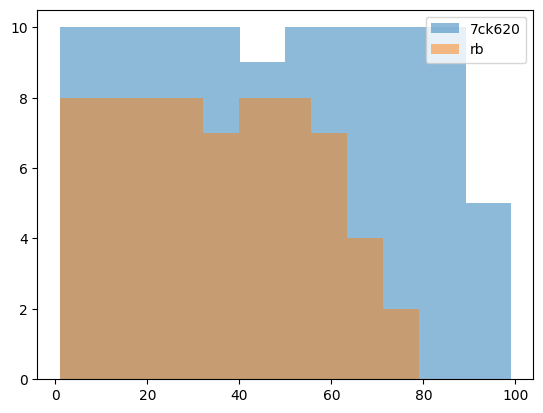

In [111]:
plt.hist(grouped_7ck620,alpha=0.5,label='7ck620');
plt.hist(grouped_rb_samples,alpha=0.5,label='rb');
plt.legend();

In [ ]:
# reconstruct prediction in 7ck620
samples_from_rb_df['true'] = samples_from_rb_df['true'].apply(lambda x: reconstruct_mol_from_atoms_and_bonds_only(x,return_smi=True))

In [ ]:
# get count of unique samples per product => histogram per product, or for the same product in all files
# be careful with canonicalization etc

In [ ]:
# isolate data with exceptionally low unique sample counts/bad round_trip match numbers
